In [1]:
import sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_excel('Subject Components Eczema with Severity and SCORAD.xlsx')

In [3]:
df = df.drop(df.tail(2).index)
df = df.drop('Subject', axis=1)
df = df.drop('Healthy/Eczema', axis=1)

In [4]:
df = df.drop("Severity", axis=1)

In [5]:
df

,SCORAD,Ceramide 2,Ceramide 3,Lactic Acid,PCA,Uric Acid,Urea,Melanin,chol,Watermass
0,52.7,0.000000,0.120289,0.026488,0.060566,0.000749,0.021031,2.230477,0.000000,43709.818546
1,66.0,0.000000,0.110608,0.086276,0.040751,0.000102,0.013240,0.037265,0.001449,50761.610963
2,70.0,0.000000,0.146709,0.051836,0.073384,0.000108,0.008633,2.728881,0.001867,39431.720135
3,65.0,0.000000,0.306053,0.229205,0.264416,0.006567,0.024359,12.517264,0.000000,24836.572041
4,61.5,0.000000,0.270734,0.129418,0.070845,0.000929,0.005694,0.733396,0.003287,76318.466566
5,28.0,0.000000,0.269898,0.029494,0.040239,0.000756,0.001809,0.671296,0.009052,71349.120402
6,34.6,0.000000,0.089972,0.092298,0.050745,0.001092,0.009536,0.281247,0.000842,43824.723571
7,25.5,0.000000,0.171575,0.068408,0.006726,0.000000,0.003233,0.000000,0.007065,58843.115552
8,65.5,0.000000,0.177142,0.047978,0.063507,0.000000,0.010505,2.324288,0.000256,29483.297350
9,49.5,0.000000,0.182292,0.083956,0.091370,0.000653,0.024600,3.598945,0.003191,58713.547888


In [6]:
col = df.pop("chol")
df.insert(len(df.columns), "Cholesterol", col)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:

best_model = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0)
best_model.fit(X,y)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r2)

Test MSE: 2.313748924419857e-07
Test R-squared: 0.9999999992259335


<Axes: xlabel='SCORAD', ylabel='Density'>

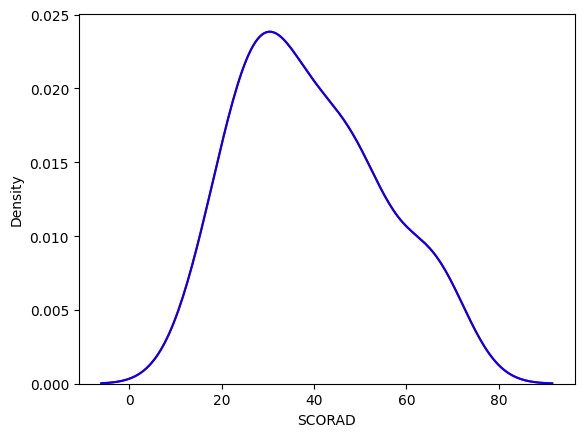

In [10]:
y_pred = best_model.predict(X)
import seaborn as sns
sns.kdeplot(y, color='r', label='Actual Values')
sns.kdeplot(y_pred, color='b', label='Predicted Values')

In [11]:
print(best_model.score(X, y))

0.9999999981788641


<Axes: title={'center': 'Feature Importance for XGBRegressor'}, xlabel='Features', ylabel='Feature Importance'>

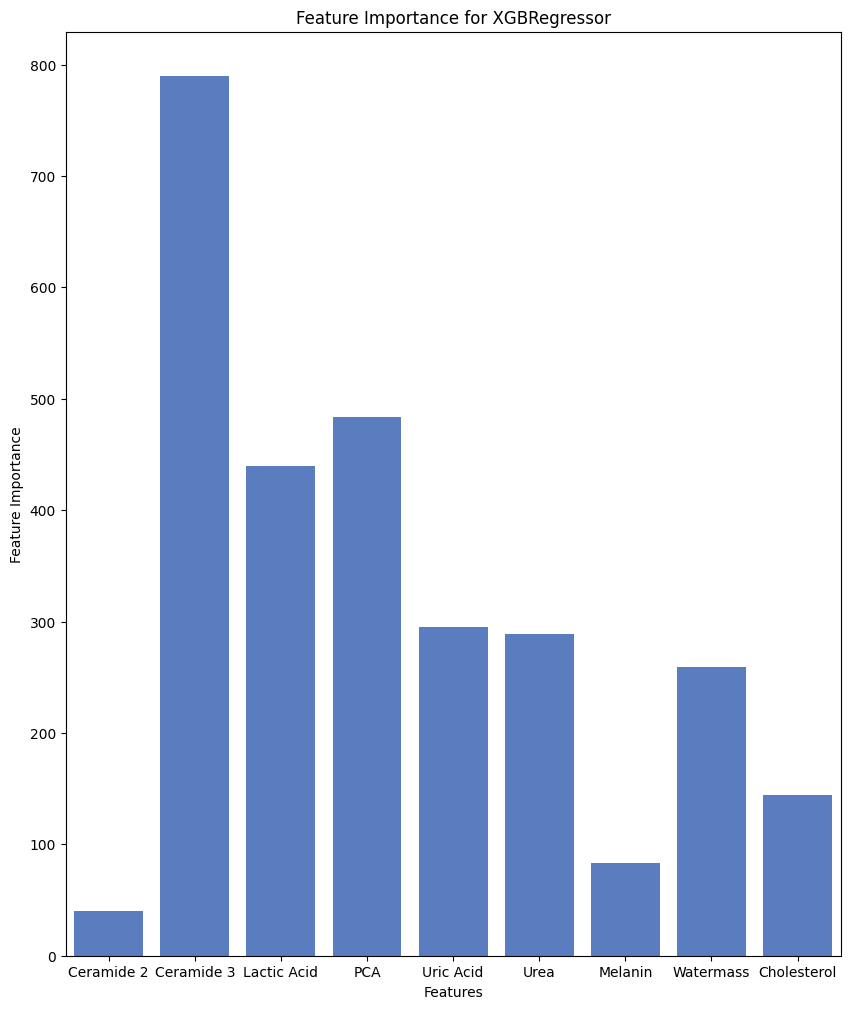

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 12))
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for XGBRegressor')
sns.set_color_codes("muted")
feature_important = best_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
sns.barplot(x=keys, y=values, color='b')